# KNN AND MKNN

In [1]:
# import preprocessing
from sklearn.model_selection import train_test_split

# import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import seaborn
import seaborn as sns

# import MinMaxNormalization
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# import numpy and pandas
import numpy as np
import pandas as pd

# import display
from IPython.display import display

# Clear all result files

In [2]:
import os

# clear result/*.csv and result/*.png
os.system("rm -f result/*.csv")
os.system("rm -f result/*.png")

0

# Pre Data Just 20 Data Train And 4 Data Test

# Import Data

In [3]:
pre_data_train = pd.read_csv('data_train.csv', index_col='No')
pre_data_test = pd.read_csv('data_test.csv', index_col='No')

# reset index
pre_data_train.reset_index(drop=True, inplace=True)
pre_data_test.reset_index(drop=True, inplace=True)

display(pre_data_train)
display(pre_data_test)

,Hotel,LT,ADY,ADM,ADWM,ADOM,SIWN,SIW2N,Adults,Childern,...,BC,DT,Agent,Company,DIWL,CT,ADR,RCPS,TOSR,RS
0,1,71,2016,9,37,10,2,2,3,0,...,0,No Deposit,9.0,NaN,0,Transient,168.30,0,2,Canceled
1,2,96,2017,2,11,12,4,7,2,0,...,0,No Deposit,NaN,NaN,0,Transient-Party,8.00,0,0,Canceled
2,1,34,2015,12,50,8,0,2,1,0,...,0,Non Refund,19.0,NaN,0,Transient,90.00,0,0,Canceled
3,1,418,2016,9,40,26,1,2,2,0,...,0,No Deposit,21.0,NaN,223,Transient-Party,75.00,0,0,Canceled
4,2,100,2017,4,17,29,2,1,2,0,...,0,No Deposit,385.0,NaN,0,Transient-Party,85.00,0,0,Canceled
5,2,115,2016,11,47,17,1,3,2,0,...,0,No Deposit,NaN,NaN,0,Transient-Party,34.00,0,0,Canceled
6,1,239,2017,8,34,25,0,1,2,2,...,0,No Deposit,9.0,NaN,0,Transient,189.00,0,1,Canceled
7,1,180,2017,7,27,6,0,3,2,0,...,0,No Deposit,9.0,NaN,0,Transient,89.10,0,0,Canceled
8,2,42,2015,8,35,28,1,2,2,2,...,1,No Deposit,240.0,NaN,0,Transient,195.00,0,2,Canceled
9,2,19,2015,10,43,21,0,2,1,0,...,0,No Deposit,208.0,NaN,0,Transient-Party,60.00,0,0,Canceled


,Hotel,LT,ADM,ADWM,RS
0,2,36,12,51,Check-Out
1,2,59,11,46,Check-Out
2,1,115,8,33,Canceled
3,2,98,3,12,Canceled


# Columns That Used In This Dataset

In [4]:
columns = ['Hotel', 'LT', 'ADM', 'ADWM', 'RS']
pre_x_train = pre_data_train[columns[:-1]]
pre_y_train = pre_data_train[columns[-1:]]

pre_x_test = pre_data_test[columns[:-1]]
pre_y_test = pre_data_test[columns[-1:]]

# print shape
print(pre_x_train.shape, pre_y_train.shape)
print(pre_x_test.shape, pre_y_test.shape)

(20, 4) (20, 1)
(4, 4) (4, 1)


# Display Each Data

In [5]:
display(
  pre_x_train.head(),
  pre_y_train.head(),
  pre_x_test.head(),
  pre_y_test.head()
)

,Hotel,LT,ADM,ADWM
0,1,71,9,37
1,2,96,2,11
2,1,34,12,50
3,1,418,9,40
4,2,100,4,17


,RS
0,Canceled
1,Canceled
2,Canceled
3,Canceled
4,Canceled


,Hotel,LT,ADM,ADWM
0,2,36,12,51
1,2,59,11,46
2,1,115,8,33
3,2,98,3,12


,RS
0,Check-Out
1,Check-Out
2,Canceled
3,Canceled


# Describe Each Data

In [6]:
display(
  pre_x_train.describe(),
  pre_y_train.describe(),
  pre_x_test.describe(),
  pre_y_test.describe()
)

,Hotel,LT,ADM,ADWM
count,20.000000,20.000000,20.000000,20.000000
mean,1.500000,107.550000,7.050000,30.100000
std,0.512989,100.834139,2.762055,11.702002
min,1.000000,1.000000,2.000000,11.000000
25%,1.000000,32.000000,5.000000,20.750000
50%,1.500000,97.500000,7.000000,29.500000
75%,2.000000,128.000000,9.000000,40.000000
max,2.000000,418.000000,12.000000,50.000000


,RS
count,20
unique,2
top,Canceled
freq,10


,Hotel,LT,ADM,ADWM
count,4.00,4.000000,4.000000,4.000000
mean,1.75,77.000000,8.500000,35.500000
std,0.50,36.009258,4.041452,17.406895
min,1.00,36.000000,3.000000,12.000000
25%,1.75,53.250000,6.750000,27.750000
50%,2.00,78.500000,9.500000,39.500000
75%,2.00,102.250000,11.250000,47.250000
max,2.00,115.000000,12.000000,51.000000


,RS
count,4
unique,2
top,Check-Out
freq,2


# Convert to float

In [7]:
# convert to float
pre_x_train = pre_x_train.astype(float)
pre_x_test = pre_x_test.astype(float)

# Turn Test Canceled to 0 and 1 for Checkout

In [8]:
# Turn Test Canceled to 0 and 1 for Checkout
pre_y_train = pre_y_train.replace('Canceled', 0)
pre_y_train = pre_y_train.replace('Check-Out', 1)
pre_y_test = pre_y_test.replace('Canceled', 0)
pre_y_test = pre_y_test.replace('Check-Out', 1)

In [9]:
display(
  pre_y_train.describe(),
  pre_y_test.describe()
)

,RS
count,20.000000
mean,0.500000
std,0.512989
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


,RS
count,4.00000
mean,0.50000
std,0.57735
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


# Normalize Data

In [10]:
# normalize x_train & y_train
scaler = MinMaxScaler()
# scaler = StandardScaler()
pre_x_train_normalized = scaler.fit_transform(pre_x_train)
pre_x_test_normalized = scaler.fit_transform(pre_x_test)

In [11]:
# display unnormalized and normalized data train  side by side
display(
  pd.DataFrame(pre_x_train, columns=columns[:-1]),
  pd.DataFrame(pre_x_train_normalized, columns=columns[:-1])
)
# display unnormalized and normalized data test  side by side
display(
  pd.DataFrame(pre_x_test, columns=columns[:-1]),
  pd.DataFrame(pre_x_test_normalized, columns=columns[:-1])
)

# save to csv files
pd.DataFrame(pre_x_train_normalized, columns=columns[:-1]).to_csv('pre_x_train_normalized.csv', index=False)
pd.DataFrame(pre_y_train, columns=columns[-1:]).to_csv('pre_y_train.csv', index=False)
pd.DataFrame(pre_x_test_normalized, columns=columns[:-1]).to_csv('pre_x_test_normalized.csv', index=False)
pd.DataFrame(pre_y_test, columns=columns[-1:]).to_csv('pre_y_test.csv', index=False)

,Hotel,LT,ADM,ADWM
0,1.0,71.0,9.0,37.0
1,2.0,96.0,2.0,11.0
2,1.0,34.0,12.0,50.0
3,1.0,418.0,9.0,40.0
4,2.0,100.0,4.0,17.0
5,2.0,115.0,11.0,47.0
6,1.0,239.0,8.0,34.0
7,1.0,180.0,7.0,27.0
8,2.0,42.0,8.0,35.0
9,2.0,19.0,10.0,43.0


,Hotel,LT,ADM,ADWM
0,0.0,0.167866,0.7,0.666667
1,1.0,0.227818,0.0,0.000000
2,0.0,0.079137,1.0,1.000000
3,0.0,1.000000,0.7,0.743590
4,1.0,0.237410,0.2,0.153846
5,1.0,0.273381,0.9,0.923077
6,0.0,0.570743,0.6,0.589744
7,0.0,0.429257,0.5,0.410256
8,1.0,0.098321,0.6,0.615385
9,1.0,0.043165,0.8,0.820513


,Hotel,LT,ADM,ADWM
0,2.0,36.0,12.0,51.0
1,2.0,59.0,11.0,46.0
2,1.0,115.0,8.0,33.0
3,2.0,98.0,3.0,12.0


,Hotel,LT,ADM,ADWM
0,1.0,0.000000,1.000000,1.000000
1,1.0,0.291139,0.888889,0.871795
2,0.0,1.000000,0.555556,0.538462
3,1.0,0.784810,0.000000,0.000000


# Pairplot Data Train X and Data Train Y

/home/ubaid/anaconda3/envs/kerasenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ubaid/anaconda3/envs/kerasenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ubaid/anaconda3/envs/kerasenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/ubaid/anaconda3/envs/kerasenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprec

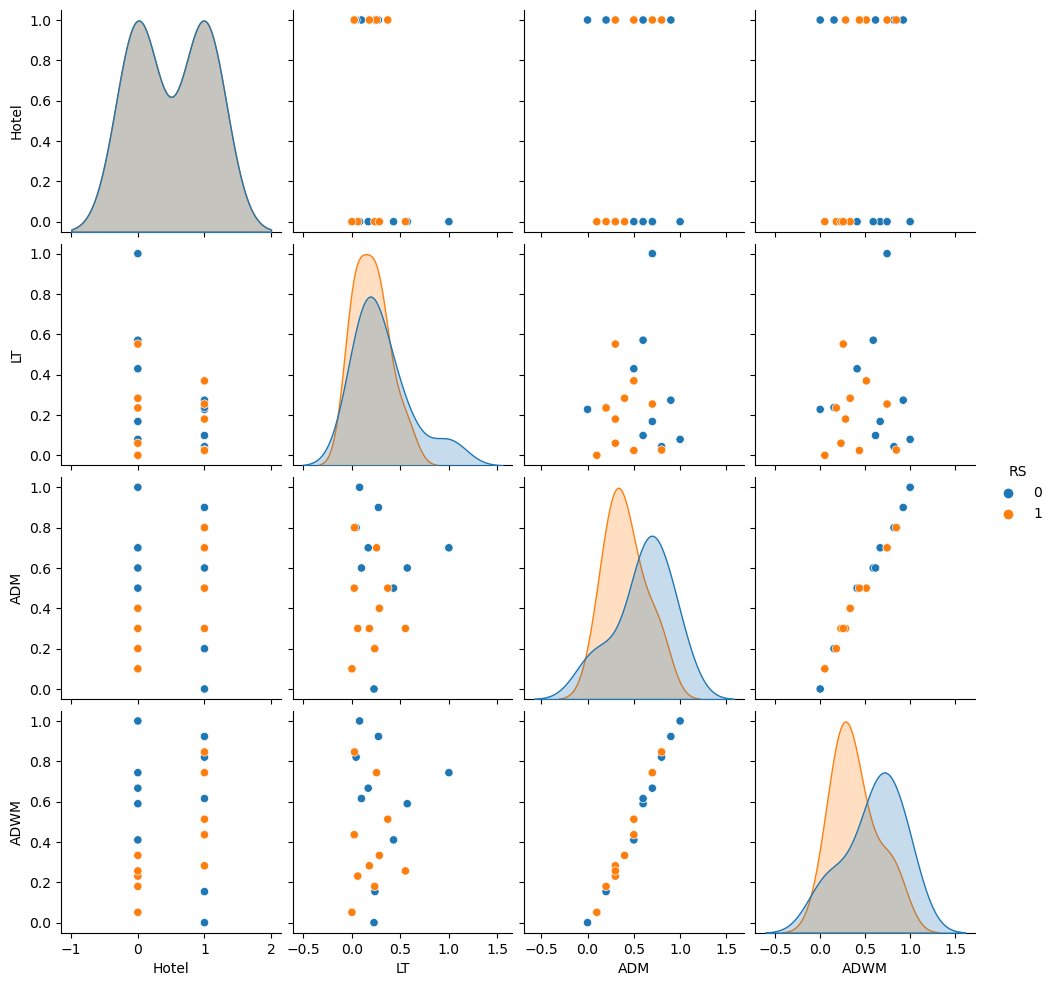

In [12]:
# reset index
pre_y_train = pre_y_train.reset_index(drop=True)
pre_y_test = pre_y_test.reset_index(drop=True)

# concat data train x and y
pre_data_train = pd.concat([pd.DataFrame(pre_x_train_normalized), pre_y_train], axis=1)

# set columns
pre_data_train.columns = columns

# Pairplot Data Train X and Data Train Y and save
sns_pairplot = sns.pairplot(pre_data_train, hue='RS')
sns_pairplot.savefig('result/pre_pairplot.png')

In [13]:
# distance
def euclidean_distance(x1, x2):
  return np.sqrt(np.sum((x1 - x2) ** 2))

In [14]:
pre_x_test

,Hotel,LT,ADM,ADWM
0,2.0,36.0,12.0,51.0
1,2.0,59.0,11.0,46.0
2,1.0,115.0,8.0,33.0
3,2.0,98.0,3.0,12.0


# KNN

In [15]:
class KNN:
  def __init__(self, k=3):
    self.k = k

  def fit(self, X, y):
    self.X_train = X
    self.y_train = y

  def predict(self, X):
    y_pred = [self._predict(x) for x in X]
    return np.array(y_pred)

  def _predict(self, x):
    # Compute distances between x and all examples in the training set
    distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
    # store to csv file
    pd.DataFrame(distances).to_csv(f'result/knn_{self.k}_distances.csv', index=False)

    # Sort by distance and return indices of the first k neighbors
    k_indices = np.argsort(distances)[:self.k]
    # store to csv file
    pd.DataFrame(k_indices).to_csv(f'result/knn_k{self.k}_indices.csv', index=False)

    # Extract the labels of the k nearest neighbor training samples
    k_nearest_labels = [self.y_train[i] for i in k_indices]
    # store to csv
    pd.DataFrame(k_nearest_labels).to_csv(f'result/knn_k{self.k}_nearest_labels.csv', index=False)

    # Return the most common class label
    most_common = np.bincount(k_nearest_labels).argmax()

    return most_common


# Test With K = 3

In [16]:
# k = 3
k = 3

# define knn
knn = KNN(k=k)
# fit knn
knn.fit(pre_x_train_normalized, pre_y_train.values.flatten())
# predict knn
y_pred = knn.predict(pre_x_test_normalized)
# calculate accuracy
accuracy = np.sum(y_pred == pre_y_test.values.flatten()) / len(pre_y_test)
# print accuracy
print(accuracy)

0.5


# Test With K start from 1 until length of data train minus 1

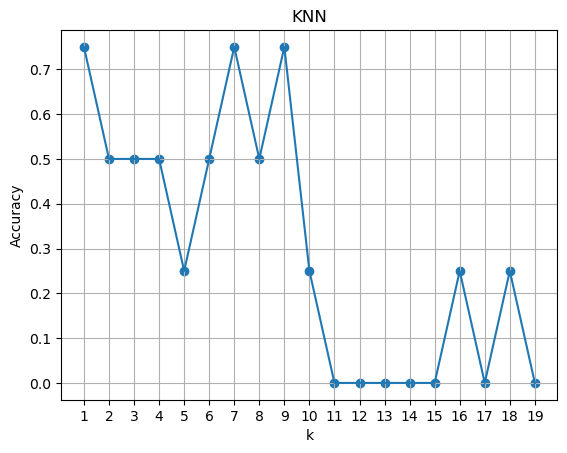

In [17]:
# define K from 1 until length of data train
k = range(1, len(pre_x_train_normalized))

# calculate KNN
accuracies = []
for i in k:
  knn = KNN(k=i)
  knn.fit(pre_x_train_normalized, pre_y_train.values.flatten())
  y_pred = knn.predict(pre_x_test_normalized)
  # save prediction to csv
  pd.DataFrame(y_pred).to_csv(f'result/knn_k{i}.csv')
  accuracy = np.sum(y_pred == pre_y_test.values.flatten()) / len(pre_y_test)
  accuracies.append(accuracy)

# plot KNN
plt.plot(k, accuracies)
# plot with dot
plt.scatter(k, accuracies)
# don't change k as float
plt.xticks(range(1, len(pre_x_train_normalized)))
# with grid
plt.grid()
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('KNN')
plt.savefig('result/knn.png')
plt.show()

# MKNN

In [18]:
# MKNN
# Tahapan analisis yang digunakan pada penelitian ini yakni sebagai berikut:
# 1.Melakukan analisis statistika deskriptif.
# 2.Melakukan standarisasi data pada semua variabel.
# 3.Melakukan pengacakan data.
# 4.Melakukan pembagian data training dan data testing berdasarkan proporsi.
# 5.Penentuan nilai k-fold cross validation.
# 6.Penentuan jumlah data dalam subset.
# 7.Menghitung jarak Euclid antar data training dan data testing.
# 8.Melakukan klasifikasi berdasarkan tertangga terdekat.
# 9.Memilih nilai K optimal berdasarkan proporsi.
# 10. Menghitung jarak Euclid antar data training.
# 11. Menghitung validitas pada data training.
# 12. Menghitung weight voting.
# 13. Menghitung akurasi ketepatan prediksi.
# buat class MKNN berdasarkan comment di atas

class MKNN:
  def __init__(self, k:int=3):
    self.k = k

  def fit(self, X_train:np.ndarray, y_train:np.ndarray):
    self.X_train = X_train
    self.y_train = y_train

    # calculate distances between X_train
    distances = []
    for i, x in enumerate(X_train):
      distances.append([euclidean_distance(x, x_train) for x_train in X_train])

    # save to csv
    pd.DataFrame(distances).to_csv(f'result/mknn_k{self.k}_distances.csv')

    # calculate validity
    self.validities = [self._validity(i, np.argsort(distances[i])[:self.k]) for i in range(len(X_train))]

    # save to csv
    pd.DataFrame(self.validities).to_csv(f'result/mknn_k{self.k}_validities.csv')

  def predict(self, X_test:np.ndarray):
    y_pred = [self._predict(x, i) for i, x in enumerate(X_test)]
    return np.array(y_pred)

  def _predict(self, x_test:np.ndarray, idx:int):
    # calculate weighted voting
    weighted_voting = np.zeros(len(self.y_train))
    for i, x_train in enumerate(self.X_train):
      # distance between x_train and x_test
      distance = euclidean_distance(x_test, x_train)
      # calculate weight voting
      weighted_voting[i] = self.validities[i] / (distance + 0.5)

    # extract with label and save to csv file with suffix index
    pd.DataFrame(weighted_voting).to_csv(f'result/mknn_k{self.k}_weighted_voting_{idx}.csv')

    # sort weighted voting
    indices = list(range(self.y_train.size))
    indices.sort(key=lambda x: weighted_voting[x], reverse=True)
    indices_sorted_k = indices[:self.k]
    # extract with label and save to csv file with suffix index
    pd.DataFrame(indices).to_csv(f'result/mknn_k{self.k}_indices_sorted_{idx}.csv')
    pd.DataFrame(indices_sorted_k).to_csv(f'result/mknn_k{self.k}_indices_sorted_k_{idx}.csv')

    # Extract the labels of the k nearest neighbor training samples
    k_nearest_labels = [self.y_train[i] for i in indices_sorted_k]
    # save to csv
    pd.DataFrame(k_nearest_labels).to_csv(f'result/mknn_k{self.k}_k_nearest_labels_{idx}.csv')

    # Return the most common class label
    most_common = np.bincount(k_nearest_labels).argmax()
    # save to csv
    pd.DataFrame([most_common]).to_csv(f'result/mknn_k{self.k}_most_common_{idx}.csv')

    return most_common
    
    # return distances

  def _validity(self, idx:int, indices_sorted_k):
    return np.sum(self.y_train[indices_sorted_k] == self.y_train[idx]) / self.k

In [19]:
mknn = MKNN()
mknn.fit(pre_x_train_normalized, pre_y_train.values.reshape(-1))
ypred = mknn.predict(pre_x_test_normalized)

# replace extract label, 0 is canceled and 1 is checkout
y_pred = np.where(ypred == 0, 'Canceled', 'Check-Out')

# print
print(y_pred)

['Canceled' 'Canceled' 'Canceled' 'Canceled']


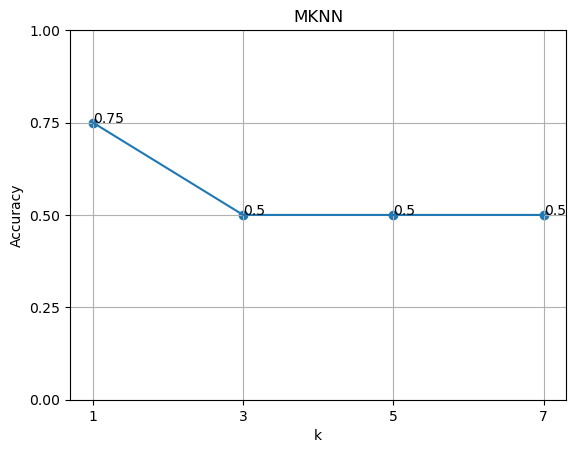

In [20]:
# run mknn with k = 1 until k = 19 then draw nrows plot
# k = range(1, 19)
k = [1, 3,5,7]
accuracies = []
for i in k:
  mknn = MKNN(k=i)
  mknn.fit(pre_x_train_normalized, pre_y_train.values.reshape(-1))
  y_pred = mknn.predict(pre_x_test_normalized)
  accuracy = np.sum(y_pred == pre_y_test.values.flatten()) / len(pre_y_test)
  accuracies.append(accuracy)

plt.plot(k, accuracies)
plt.scatter(k, accuracies)
# plt.xticks(range(1, 20))
# xticks
plt.xticks(k)
# yticks according to data test count
plt.yticks(np.arange(0, len(pre_y_test), 1/pre_y_test.size))
plt.grid()
plt.xlabel('k')
plt.ylabel('Accuracy')
# show label per scatter
for i, txt in enumerate(accuracies):
    plt.annotate(txt, (k[i], accuracies[i]))
# plot max is 1
plt.ylim(0, 1)
plt.title('MKNN')
plt.savefig('result/mknn.png')
plt.show()

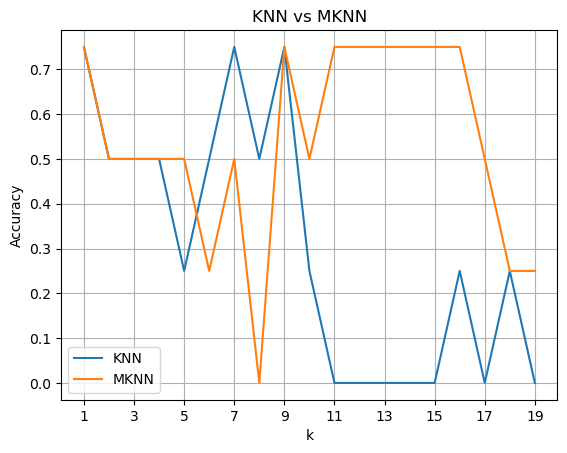

In [21]:
# compare KNN and MKNN

# loop of K for KNN
k = range(1, len(pre_x_train_normalized))
accuracies_knn = []
for i in k:
  knn = KNN(k=i)
  knn.fit(pre_x_train_normalized, pre_y_train.values.flatten())
  y_pred = knn.predict(pre_x_test_normalized)
  accuracy = np.sum(y_pred == pre_y_test.values.flatten()) / len(pre_y_test)
  accuracies_knn.append(accuracy)

# loop of K for MKNN
k = range(1, len(pre_x_train_normalized))
accuracies_mknn = []
for i in k:
  mknn = MKNN(k=i)
  mknn.fit(pre_x_train_normalized, pre_y_train.values.reshape(-1))
  y_pred = mknn.predict(pre_x_test_normalized)
  accuracy = np.sum(y_pred == pre_y_test.values.flatten()) / len(pre_y_test)
  accuracies_mknn.append(accuracy)

# plot
plt.plot(k, accuracies_knn, label='KNN')
plt.plot(k, accuracies_mknn, label='MKNN')
# plt.scatter(k, accuracies_knn)
# plt.scatter(k, accuracies_mknn)
plt.xticks(range(1, len(pre_x_train_normalized), 2))
plt.grid()
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('KNN vs MKNN')
plt.legend()
plt.savefig('result/knn_vs_mknn.png')
plt.show()

In [22]:
def confusion_matrix(y_actual, y_pred):
  TP = np.sum((y_actual == 1) & (y_pred == 1))
  TN = np.sum((y_actual == 0) & (y_pred == 0))
  FP = np.sum((y_actual == 0) & (y_pred == 1))
  FN = np.sum((y_actual == 1) & (y_pred == 0))
  return TP, TN, FP, FN

def accuracy(TP, TN, FP, FN):
  return (TP + TN) / (TP + TN + FP + FN)

def precision(TP, FP):
  return TP / (TP + FP)

def recall(TP, FN):
  return TP / (TP + FN)

def f1_score(precision, recall):
  return 2 * (precision * recall) / (precision + recall)

/tmp/ipykernel_182891/4032717657.py:12: RuntimeWarning: invalid value encountered in long_scalars
  return TP / (TP + FP)
/tmp/ipykernel_182891/4032717657.py:18: RuntimeWarning: invalid value encountered in double_scalars
  return 2 * (precision * recall) / (precision + recall)


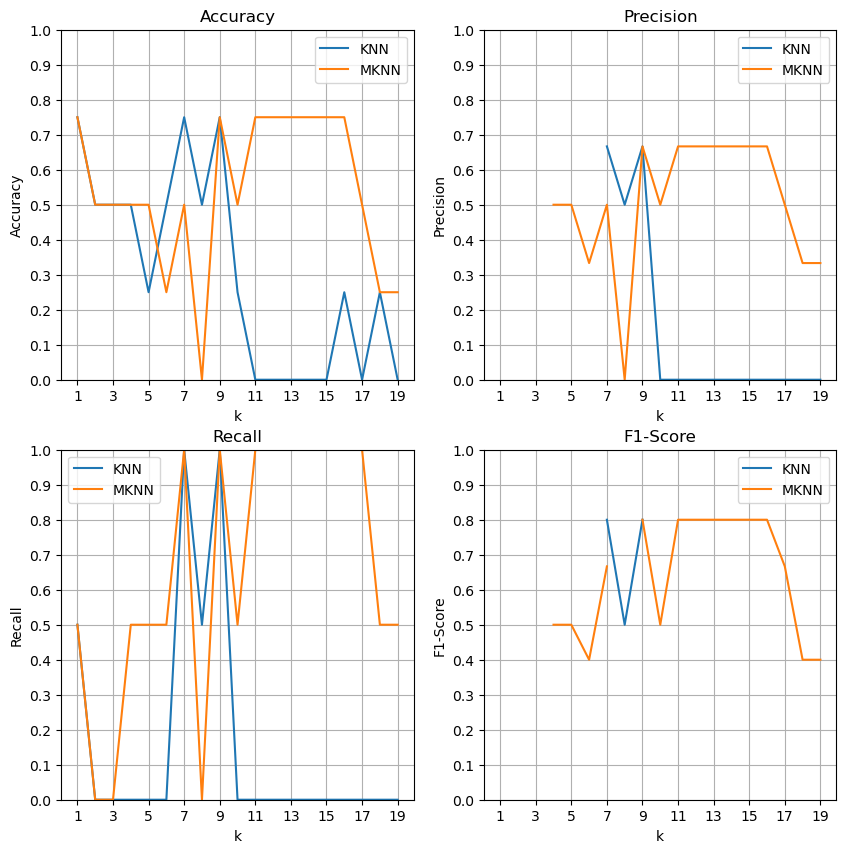

In [23]:
# confusion matrix, classification report for KNN in loops
k = range(1, len(pre_x_train_normalized))
confusion_matrices_knn = []
classification_report_knn = []
accuracies_knn = []
precisions_knn = []
recalls_knn = []
f1_scores_knn = []

for i in k:
  knn = KNN(k=i)
  knn.fit(pre_x_train_normalized, pre_y_train.values.flatten())
  y_pred = knn.predict(pre_x_test_normalized)
  confusion_matrices_knn.append(confusion_matrix(pre_y_test.values.flatten(), y_pred))
  # accuracy, precision, recall and f1-score use function above
  TP, TN, FP, FN = confusion_matrices_knn[-1]
  accuracies_knn.append(accuracy(TP, TN, FP, FN))
  precisions_knn.append(precision(TP, FP))
  recalls_knn.append(recall(TP, FN))
  f1_scores_knn.append(f1_score(precisions_knn[-1], recalls_knn[-1]))

# confusion matrix for MKNN in loops
k = range(1, len(pre_x_train_normalized))
confusion_matrices_mknn = []
classification_report_mknn = []
accuracies_mknn = []
precisions_mknn = []
recalls_mknn = []
f1_scores_mknn = []

for i in k:
  mknn = MKNN(k=i)
  mknn.fit(pre_x_train_normalized, pre_y_train.values.reshape(-1))
  y_pred = mknn.predict(pre_x_test_normalized)
  confusion_matrices_mknn.append(confusion_matrix(pre_y_test.values.flatten(), y_pred))
  # accuracy, precision, recall and f1-score
  TP, TN, FP, FN = confusion_matrices_mknn[-1]
  accuracies_mknn.append(accuracy(TP, TN, FP, FN))
  precisions_mknn.append(precision(TP, FP))
  recalls_mknn.append(recall(TP, FN))
  f1_scores_mknn.append(f1_score(precisions_mknn[-1], recalls_mknn[-1]))

# plot use fig
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# plot accuracy
axs[0, 0].plot(k, accuracies_knn, label='KNN')
axs[0, 0].plot(k, accuracies_mknn, label='MKNN')
axs[0, 0].set_title('Accuracy')
axs[0, 0].set_xlabel('k')
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].legend()

# plot precision
axs[0, 1].plot(k, precisions_knn, label='KNN')
axs[0, 1].plot(k, precisions_mknn, label='MKNN')
axs[0, 1].set_title('Precision')
axs[0, 1].set_xlabel('k')
axs[0, 1].set_ylabel('Precision')
axs[0, 1].legend()

# plot recall
axs[1, 0].plot(k, recalls_knn, label='KNN')
axs[1, 0].plot(k, recalls_mknn, label='MKNN')
axs[1, 0].set_title('Recall')
axs[1, 0].set_xlabel('k')
axs[1, 0].set_ylabel('Recall')
axs[1, 0].legend()

# plot f1-score
axs[1, 1].plot(k, f1_scores_knn, label='KNN')
axs[1, 1].plot(k, f1_scores_mknn, label='MKNN')
axs[1, 1].set_title('F1-Score')
axs[1, 1].set_xlabel('k')
axs[1, 1].set_ylabel('F1-Score')
axs[1, 1].legend()

# same ticks and limit
for ax in axs.flat:
    ax.set_xticks(range(1, len(pre_x_train_normalized), 2))
    ax.set_yticks(np.arange(0, 1.1, 0.1))
    ax.grid()
    ax.set_ylim(0, 1)

plt.savefig('result/knn_vs_mknn_metrics.png')
plt.show()